## Final Project
### Joanna Garcia
### Data Wrangling - BIOS 6644
### May 15, 2024

---

## Overview

The data I am using is the Colorado Health Access Survey (CHAS) by the Colorado Health Institute (CHI). For my capstone, I am using CHAS data to understand the relationship between housing stability and mental health; specifically, if housing stability is a protective factor against poor mental health. 

For this project, I am toying with the CHAS data to get familar with it, and to create a dataset that I will be able to use to conduct my analysis. As you will see, the data is full of additional information that, while important, is unrelated to my project. I hope to have a usable data set that is ready for me to conduct the analysis on.

**Wrangle Plan**:
1. Obtain all datasets from the CHI website - 2019, 2021, 2023
2. Clean all datasets 
    * Exclude any covariates that are unrelated to my project, etc.
    * Change the format of variables (full names instead of numbers (1,2, etc.)
3. Combine the datasets for all 3 years 
    * Create a "year" variable to identify where the data came from




**Goal end product**:
A usable dataset for my project that includes all of the covariates of interest for all three years: 2019, 2021, and 2023

---

## Variables 

On the CHI website, they provide a CHAS data dictionary and code book. I used this to identify the variables that I am interested in investigating in my analysis.

*(Note: the following is based on the 2023 data. The descriptions/names for 2021 and 2019 may differ as noted below)*

#### **Main variables of investigation**:
* Housing Instability (primary explanatory variable)
    * "lack of housing stability within the next 2 months"
* Mental Health (outcome)
    * "count of poor mental health over 30 day period"

| Variable | Questionnaire Text / Description | Analysis Weight |
| ------- | -------- | ------- | 
| STABLE_HOUSING (primary explanatory variable) | D11. Are you worried that in the next 2 months, you may not have stable housing? | Wgt_pop |
| DAYS_POOR_MH (outcome) | MH1. How many days during the past 30 days was your mental health not good?  | Wgt_pop |


#### **Covariates of interest**:
* Age / age group (generation)
* Household count
* Family size
* Marital Status
* Insurance coverage 
* Renter and/or Homeowners
* Needed but did not receive mental health care
* Federal Poverty Level
* Employment Status
* Gender / gender identity
* Race/Ethnicity
* Language Status
* Education level
* Urban/Rural Status

| Variable | Questionnaire Text / Description | Analysis Weight |
| ------- | -------- | ------- | 
| AGE | Continuous age variable |  |
| AGE_GRP | Age group (created)  |  |
| NUM_HH | Number of people in household  |  |
| NUM_FAM | Number of people in family |  |
| MARRIED | Is target married or single? |  |
| INSURANCE | Type of health insurance (created) |  |
| INSURED_PIT | Currently has health insurance (at time of survey) |  |
| HOME_OWNER | D10. Is this owned, rented, or occupied without payment of rent? |  |
| NEEDED_MH | MH2. In past 12 months, was there a time when needed mental health care but did not get it? | Wgt_pop |
| FPL | Percentage of 2023 Federal Poverty Level (continuous) |  |
| EMP_CATEGORY | E1. Are you currently employed? (Choose what type of employment) |  |
| GENDER | Sex or gender (created from current gender) |  |
| RACE | Race/ethnicity identity (mutually exclusive) |  |
| SPK_ENGLISH | Speaks language other than English at home (created from D6)  |  |
| SPK_OTHER | Speaks language other than Spanish or English at home (created from D6 and D7) |  |
| SPK_SPANISH | Speaks Spanish at home (created from D6 and D7) |  |
| EDUCATION | S9. What is the highest level of school you completed or the highest degree you have received? |  |
| URBAN | Lives in urban or rural area (created) |  |



---

## Let's get started!

In [166]:
# imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

To start, I uploaded the datasets as data frames using ***pandas***.

In [150]:
# CHAS 2023 Data
df_2023 = pd.read_csv('/Users/joannagarcia/Desktop/Data Wrangling/_Final Project/2023 CHAS PUF Data Dictionary/CHAS2023_PUF.csv')

# CHAS 2021 Data
df_2021 = pd.read_csv('/Users/joannagarcia/Desktop/Data Wrangling/_Final Project/2021 CHAS PUF Data Dictionary/CHAS2021_PUF.csv')

# CHAS 2019 Data
df_2019 = pd.read_csv('/Users/joannagarcia/Desktop/Data Wrangling/_Final Project/2019 CHAS PUF/CHAS2019_PUF.csv')


--

Next, I create new dataframes, extracting the columns I need. 

**Main variables of investigation:**
| Variable | 2023 | 2021 | 2019 |
| ------- | ------- | -------- | ------- | 
| Housing Instability (primary explanatory variable) | STABLE_HOUSING | STABLE_HOUSING | STABLE_HOUSING |
| Poor Mental Health (outcome) | DAYS_POOR_MH | DAYS_POOR_MH | --- |



**Other covariates of interest:**
|Covariate of Interest| 2023 | 2021 | 2019 |
| ------- | ------- | -------- | ------- | 
| Age | AGE | --- | --- |
| Age / age group (generation)| AGE_GRP | AGE_GRP | AGE_GRP |
| Household count | NUM_HH | NUM_HH | NUM_HH |
| Family size | NUM_FAM | NUM_FAM | NUM_FAM |
| Marital Status | MARRIED | MARRIED | MARRIED |
| Insurance coverage  | INSURANCE | INSURANCE | INSURANCE |
| Current insurance coverage | INSURED_PIT | INSURED_PIT | INSURED_PIT |
| Renter and/or Homeowners | HOME_OWNER | HOME_OWNER | HOME_OWNER |
| Needed but did not receive mental health care | NEEDED_MH | NEEDED_MH | NEEDED_MH |
| Federal Poverty Level | FPL | --- | --- |
| Employment Status | EMP_CATEGORY | EMP_CATEGORY | EMP_CATEGORY |
| Gender / gender identity | GENDER | GENDER | GENDER |
| Race/Ethnicity | RACE | RACE | --- |
| Language Status - language other than english | SPK_ENGLISH | SPK_ENGLISH |  SPK_ENGLISH|
| Language Status - language other than English or Spanish| SPK_OTHER | SPK_OTHER | SPK_OTHER |
| Language Status - speak Spanish at home | SPK_SPANISH | SPK_SPANISH | SPK_SPANISH |
| Education level | EDUCATION | EDUCATION | EDUCATION |
| Urban/Rural Status | URBAN | URBAN | URBAN |


The covariates that are missing from the 2021 or 2019 CHAS CSV were sent to me by my preceptor in an .xsls file.

--

#### 2023

Not much to fix here, it has all of the data needed

In [151]:
# create a new dataframe with variable of interested (listed above)
new_2023 = df_2023[['ID', 'STABLE_HOUSING', 'DAYS_POOR_MH', 'AGE', 'AGE_GRP', 'NUM_HH', 'NUM_FAM', 'MARRIED', 'INSURANCE', 'INSURED_PIT', 'HOME_OWNER', 'NEEDED_MH', 'FPL', 'EMP_CATEGORY', 'GENDER', 'RACE', 'SPK_ENGLISH', 'SPK_OTHER', 'SPK_SPANISH', 'EDUCATION', 'URBAN' ]].copy()

# create a 'Year' column to identify the data as 2023 data
new_2023['Year'] = '2023'

# view the new df (9961 values, 22 columns)
new_2023.head(3)

ID STABLE_HOUSING  DAYS_POOR_MH   AGE             AGE_GRP     NUM_HH  \
0  31000242             No           0.0  53.0         55-64 years   2 people   
1  31000523             No           0.0  71.0  65 years and older   1 person   
2  31000881             No           2.0  44.0         35-54 years  5+ people   

     NUM_FAM      MARRIED                                         INSURANCE  \
0   2 people      Married  Individually-purchased insurance/other insurance   
1   1 person  Not married                                          Medicare   
2  5+ people      Married                      Employer-sponsored insurance   

               INSURED_PIT  ...          FPL  \
0  Currently has insurance  ...   546.149645   
1  Currently has insurance  ...  1074.319352   
2  Currently has insurance  ...   400.369572   

                                   EMP_CATEGORY  GENDER  \
0                                 Self-employed  Female   
1  Employed by someone else (includes military)    Male   
2  Employed by someone else (includes military)  Female   

                                                RACE             SPK_ENGLISH  \
0                         White, Non-Hispanic/Latino          Speaks English   
1                         White, Non-Hispanic/Latino          Speaks English   
2  Asian, Native Hawaiian or Other Pacific Island...  Does not speak English   

                                           SPK_OTHER             SPK_SPANISH  \
0  Does not speak language other than Spanish or ...  Does not speak Spanish   
1  Does not speak language other than Spanish or ...  Does not speak Spanish   
2      Speaks language other than Spanish or English  Does not speak Spanish   

                    EDUCATION  URBAN  Year  
0  Some college but no degree  Rural  2023  
1            College graduate  Urban  2023  
2            College graduate  Rural  2023  

[3 rows x 22 columns]

--

#### 2021

In [152]:
# create a new dataframe with variable of interested (listed above)
new_2021 = df_2021[['ID', 'STABLE_HOUSING', 'DAYS_POOR_MH', 'AGE_GRP', 'NUM_HH', 'NUM_FAM', 'MARRIED', 'INSURANCE', 'INSURED_PIT', 'HOME_OWNER', 'NEEDED_MH', 'EMP_CATEGORY', 'GENDER', 'RACE', 'SPK_ENGLISH', 'SPK_OTHER', 'SPK_SPANISH', 'EDUCATION', 'URBAN' ]].copy()

# missing: 'AGE', 'FPL'
    # get from xsls 

# create a 'Year' column to identify the data as 2023 data
new_2021['Year'] = '2021'

# view the new df
new_2021.head(1)

ID STABLE_HOUSING  DAYS_POOR_MH             AGE_GRP    NUM_HH  \
0  10000277             No           0.0  65 years and older  2 people   

    NUM_FAM      MARRIED INSURANCE              INSURED_PIT HOME_OWNER  \
0  2 people  Not married  Medicare  Currently has insurance      Owned   

  NEEDED_MH EMP_CATEGORY  GENDER                        RACE     SPK_ENGLISH  \
0        No      Retired  Female  White, Non-Hispanic/Latino  Speaks English   

                                           SPK_OTHER             SPK_SPANISH  \
0  Does not speak language other than Spanish or ...  Does not speak Spanish   

           EDUCATION  URBAN  Year  
0  Associates degree  Rural  2021

In [153]:
# the data missing from the PUF: AGE, FPL

missing_2021 = pd.read_excel('/Users/joannagarcia/Desktop/Data Wrangling/_Final Project/Joanna_CHAS2021.xlsx')

# rename column to match the other datasets
missing_2021 = missing_2021.rename(columns={'fpl2': 'FPL'})

missing_2021.head(1)

ID   AGE  DAYS_POOR_MH       FPL  race
0  10000277  76.0           0.0  3.654292     1

In [154]:
# merge the missing info with the original dataset
new_2021 = pd.merge(new_2021, missing_2021[['ID', 'AGE', 'FPL']], on='ID', how='inner')

# view the new df (10405 observations, 22 columns)
new_2021.head(1)


ID STABLE_HOUSING  DAYS_POOR_MH             AGE_GRP    NUM_HH  \
0  10000277             No           0.0  65 years and older  2 people   

    NUM_FAM      MARRIED INSURANCE              INSURED_PIT HOME_OWNER  ...  \
0  2 people  Not married  Medicare  Currently has insurance      Owned  ...   

   GENDER                        RACE     SPK_ENGLISH  \
0  Female  White, Non-Hispanic/Latino  Speaks English   

                                           SPK_OTHER             SPK_SPANISH  \
0  Does not speak language other than Spanish or ...  Does not speak Spanish   

           EDUCATION  URBAN  Year   AGE       FPL  
0  Associates degree  Rural  2021  76.0  3.654292  

[1 rows x 22 columns]

--

#### 2019

In [155]:
# create a new dataframe with variable of interested (listed above)
new_2019 = df_2019[['id', 'stable_housing', 'age_grp', 'num_hh', 'num_fam', 'married', 'insurance', 'insured_pit', 'home_owner', 'needed_mh', 'emp_category', 'gender', 'spk_english', 'spk_other', 'spk_spanish', 'education', 'urban']].copy()

# Convert column headers to uppercase (they were lowercase originally)
new_2019.columns = new_2019.columns.str.upper()

# missing: 'DAYS_POOR_MH', 'AGE', 'FPL', 'RACE'
    # get from xsls

# create a 'Year' column to identify the data as 2023 data
new_2019['Year'] = '2019'

new_2019.head(1)


ID STABLE_HOUSING      AGE_GRP    NUM_HH   NUM_FAM  MARRIED  \
0  10000001             No  55-64 years  2 people  2 people  Married   

                                INSURANCE              INSURED_PIT  \
0  Medicaid/Child Health Plan Plus (CHP+)  Currently has insurance   

                                   HOME_OWNER NEEDED_MH  \
0  Rented or occupied without payment of rent        No   

                             EMP_CATEGORY  GENDER     SPK_ENGLISH  \
0  Unable to work because of a disability  Female  Speaks English   

                                           SPK_OTHER             SPK_SPANISH  \
0  Does not speak language other than Spanish or ...  Does not speak Spanish   

                            EDUCATION  URBAN  Year  
0  High school graduate or equivalent  Urban  2019

In [165]:
# the data missing from the PUF
missing_2019 = pd.read_excel('/Users/joannagarcia/Desktop/Data Wrangling/_Final Project/Joanna_CHAS2019.xlsx')

# rename column to match the other datasets
missing_2019 = missing_2019.rename(columns={'fpl2': 'FPL', 'race':'RACE'})

missing_2019.head(3)

ID  AGE  DAYS_POOR_MH       FPL  RACE
0  10000001   60           5.0  0.191130     1
1  10000002   73           0.0  0.065898     1
2  10000004   65           3.0  3.645200     1

*Change the race values from numbers to their word values*

In [157]:
# Define mapping dictionary 
race_mapping = {
    1: "American Indian or Alaska Native, Non-Hispanic/Latino",
    2: "Asian, Native Hawaiian or Other Pacific Islander, Non-Hispanic/Latino",
    3: "Black or African American, Non-Hispanic/Latino",
    4: "Hispanic/Latino",
    5: "Some Other Race, Non-Hispanic/Latino",
    6: "White, Non-Hispanic/Latino",
    7: "More Than One Race, Non-Hispanic/Latino",
   -9: "Don't know/refused"
}

# Replace numeric values with their meanings
missing_2019["RACE"] = missing_2019["RACE"].replace(race_mapping)

missing_2019.head(5)


ID  AGE  DAYS_POOR_MH       FPL  \
0  10000001   60           5.0  0.191130   
1  10000002   73           0.0  0.065898   
2  10000004   65           3.0  3.645200   
3  10000006   45           0.0  6.204613   
4  10000007   63           0.0  4.942339   

                                                RACE  
0  American Indian or Alaska Native, Non-Hispanic...  
1  American Indian or Alaska Native, Non-Hispanic...  
2  American Indian or Alaska Native, Non-Hispanic...  
3  American Indian or Alaska Native, Non-Hispanic...  
4  American Indian or Alaska Native, Non-Hispanic...

In [158]:
# merge the missing info with the original dataset
new_2019 = pd.merge(new_2019, missing_2019, on='ID', how='inner')

# view the new df (10265 observations, 22 columns)
new_2019.head(1)



ID STABLE_HOUSING      AGE_GRP    NUM_HH   NUM_FAM  MARRIED  \
0  10000001             No  55-64 years  2 people  2 people  Married   

                                INSURANCE              INSURED_PIT  \
0  Medicaid/Child Health Plan Plus (CHP+)  Currently has insurance   

                                   HOME_OWNER NEEDED_MH  ...     SPK_ENGLISH  \
0  Rented or occupied without payment of rent        No  ...  Speaks English   

                                           SPK_OTHER             SPK_SPANISH  \
0  Does not speak language other than Spanish or ...  Does not speak Spanish   

                            EDUCATION  URBAN  Year AGE DAYS_POOR_MH      FPL  \
0  High school graduate or equivalent  Urban  2019  60          5.0  0.19113   

                                                RACE  
0  American Indian or Alaska Native, Non-Hispanic...  

[1 rows x 22 columns]

--

### Merge all datasets

I need to merge the datasets to create a long dataset. The column names are the same but there aren't any values in the columns that would be the same among the 3 datasets (different ids, etc.)

In [159]:
# List of DataFrames to merge
dfs = [new_2019, new_2021, new_2023]

# Concatenate the DataFrames vertically
chas_df = pd.concat(dfs, ignore_index=True)

# Display the merged DataFrame (30631 observations, 22 columns - perfect!)
chas_df.head(5)

ID STABLE_HOUSING             AGE_GRP    NUM_HH   NUM_FAM  \
0  10000001             No         55-64 years  2 people  2 people   
1  10000002             No  65 years and older  1 person  1 person   
2  10000004             No  65 years and older  2 people  2 people   
3  10000006             No         35-54 years  2 people  1 person   
4  10000007             No         55-64 years  3 people  1 person   

       MARRIED                               INSURANCE  \
0      Married  Medicaid/Child Health Plan Plus (CHP+)   
1  Not married  Medicaid/Child Health Plan Plus (CHP+)   
2      Married                                Medicare   
3  Not married            Employer-sponsored insurance   
4  Not married            Employer-sponsored insurance   

               INSURED_PIT                                  HOME_OWNER  \
0  Currently has insurance  Rented or occupied without payment of rent   
1  Currently has insurance  Rented or occupied without payment of rent   
2  Currently has insurance                                       Owned   
3  Currently has insurance  Rented or occupied without payment of rent   
4  Currently has insurance                                       Owned   

  NEEDED_MH  ...     SPK_ENGLISH  \
0        No  ...  Speaks English   
1        No  ...  Speaks English   
2        No  ...  Speaks English   
3        No  ...  Speaks English   
4        No  ...  Speaks English   

                                           SPK_OTHER             SPK_SPANISH  \
0  Does not speak language other than Spanish or ...  Does not speak Spanish   
1  Does not speak language other than Spanish or ...  Does not speak Spanish   
2  Does not speak language other than Spanish or ...  Does not speak Spanish   
3  Does not speak language other than Spanish or ...  Does not speak Spanish   
4  Does not speak language other than Spanish or ...  Does not speak Spanish   

                            EDUCATION  URBAN  Year   AGE DAYS_POOR_MH  \
0  High school graduate or equivalent  Urban  2019  60.0          5.0   
1  High school graduate or equivalent  Rural  2019  73.0          0.0   
2                   Associates degree  Urban  2019  65.0          3.0   
3                    College graduate  Urban  2019  45.0          0.0   
4  High school graduate or equivalent  Rural  2019  63.0          0.0   

        FPL                                               RACE  
0  0.191130  American Indian or Alaska Native, Non-Hispanic...  
1  0.065898  American Indian or Alaska Native, Non-Hispanic...  
2  3.645200  American Indian or Alaska Native, Non-Hispanic...  
3  6.204613  American Indian or Alaska Native, Non-Hispanic...  
4  4.942339  American Indian or Alaska Native, Non-Hispanic...  

[5 rows x 22 columns]

---

## Visualizations!

### **Stable Housing** (primary explanatory variable)

**Description**: "D11. Are you worried that in the next 2 months, you may not have stable housing?"

**Analysis weight**: Weighted population

In [160]:
# Calculate counts of "Yes" and "No" for each year
counts_per_year = chas_df.groupby(["Year", "STABLE_HOUSING"]).size().unstack(fill_value=0)

print(counts_per_year)

STABLE_HOUSING  Don't know/refused    No  Yes
Year                                         
2019                           219  9593  431
2021                           278  9626  477
2023                           321  9048  555


*Create a barplot*

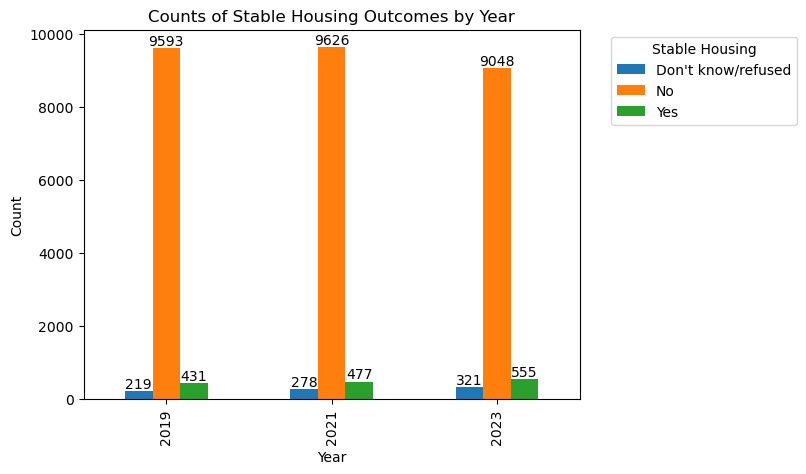

In [161]:
# received some help from geeksforgeeks: https://www.geeksforgeeks.org/python-pandas-dataframe-plot-bar/

# calculate counts of "Yes", "No", and "Don't know/refused" for each year
ax = counts_per_year.plot(kind='bar', stacked=False)

# plot the plot
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Counts of Stable Housing Outcomes by Year')
plt.legend(title='Stable Housing', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add counts
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()


#consider log the y axis to change the wide gap between the values 

--

### **Mental Health** (outcome)

**Description**: MH1. How many days during the past 30 days was your mental health not good?

**Analysis weight**: Weighted population

In [162]:
# Calculate counts of poor mental health days for each year
mh = chas_df.groupby(["Year", "DAYS_POOR_MH"]).size().unstack(fill_value=0)

print(mh)

DAYS_POOR_MH  -9.0    0.0    1.0    2.0    3.0    4.0    5.0    6.0    7.0   \
Year                                                                          
2019              0   5626    385    578    339    134    415     38     88   
2021           1299   4097    382    675    432    250    644     67    155   
2023           1842   3619    379    634    391    210    604     55    123   

DAYS_POOR_MH   8.0   ...   21.0   22.0   23.0   24.0   25.0   26.0   27.0  \
Year                 ...                                                    
2019             29  ...      3      4      2      4     81      4      6   
2021             50  ...     13     10     12      3    142      6      8   
2023             59  ...      6      6      3      3    129      3      7   

DAYS_POOR_MH   28.0   29.0   30.0  
Year                               
2019             16     15    288  
2021             40     25    421  
2023             31     14    381  

[3 rows x 32 columns]


*Create a line graph*

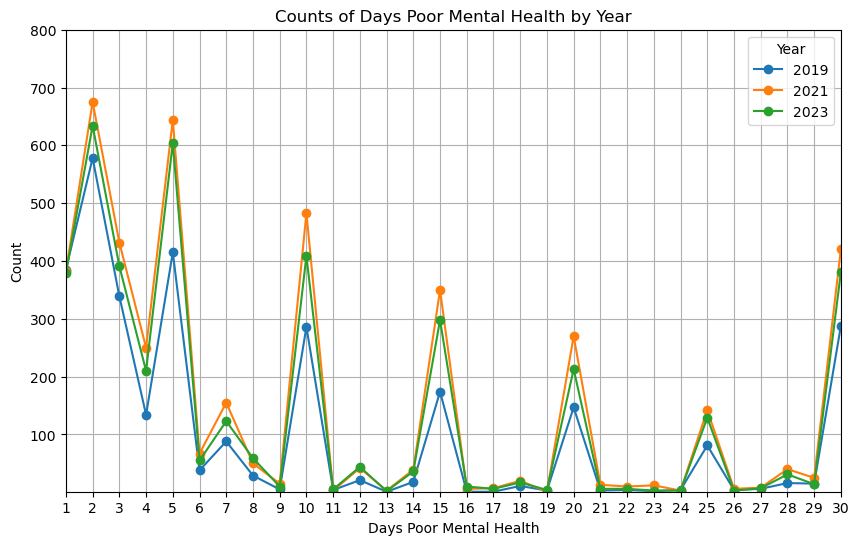

In [163]:
# received some help from geeksforgeeks: https://www.geeksforgeeks.org/line-chart-in-matplotlib-python/

plt.figure(figsize=(10, 6))
for year in ['2019', '2021', '2023']:
    plt.plot(mh.columns, mh.loc[year], marker='o', label=str(year))

plt.xlabel('Days Poor Mental Health')
plt.ylabel('Count')
plt.title('Counts of Days Poor Mental Health by Year')

# Set x-axis limit to start at 1
plt.xlim(1, 30)

# Set y-axis limit
plt.ylim(1, 800)

plt.xticks(range(1, 31))  # Set x-axis ticks to match available days
plt.grid(True)
plt.legend(title='Year')
plt.show()

--

### **Poor Mental Health and Housing Stability**

This is the relationship I'm focusing on. 

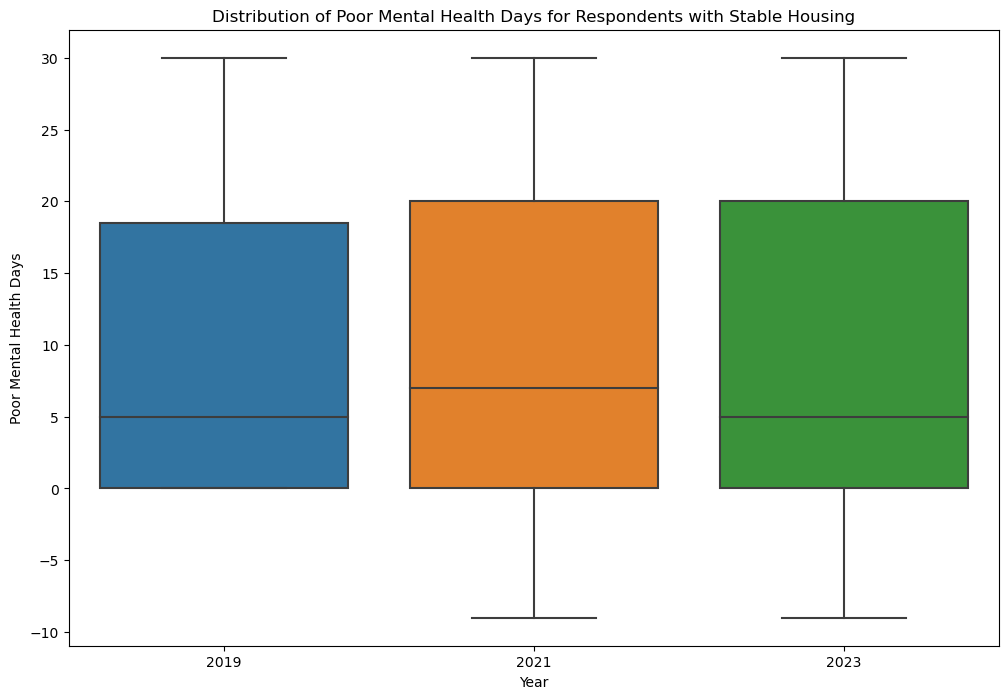

In [164]:
# received some help from geeksforgeeks (https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/) and chatgpt

yes_data = chas_df[chas_df['STABLE_HOUSING'] == 'Yes']

# Plot the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Year', y='DAYS_POOR_MH', data=yes_data)
plt.xlabel('Year')
plt.ylabel('Poor Mental Health Days')
plt.title('Distribution of Poor Mental Health Days for Respondents with Stable Housing')
plt.show()